In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r"C:\Users\HP\Downloads\day.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


##### Checking for null values and data info

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no missing values in the set

In [5]:
data.shape

(730, 16)

In [6]:
#Since casual+registered = cnt, we can drop these two columns. dteday is the date which is getting covered in the yr and mnth column.
#instant is just the index no.
data = data.drop(columns=['instant','dteday','casual','registered'])


In [7]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


- numerical values = temp, atemp, hum, windspeed, cnt
- categorical columns= season, yr, mnth, weekday, workingday, weathersit

###### Statistical summary of the numerical columns

In [8]:
data[['temp','atemp','hum','windspeed']].describe()

,temp,atemp,hum,windspeed
count,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620
std,7.506729,8.150308,14.237589,5.195841
min,2.424346,3.953480,0.000000,1.500244
25%,13.811885,16.889713,52.000000,9.041650
50%,20.465826,24.368225,62.625000,12.125325
75%,26.880615,30.445775,72.989575,15.625589
max,35.328347,42.044800,97.250000,34.000021


##### 1. Visualising Numerical Columns

 PAIRPLOTS TO IDENTIFY IF THERE IS ANY RELATION BETWEEN THE NUMERICAL COLUMNS/VALUES

<Figure size 1440x720 with 0 Axes>

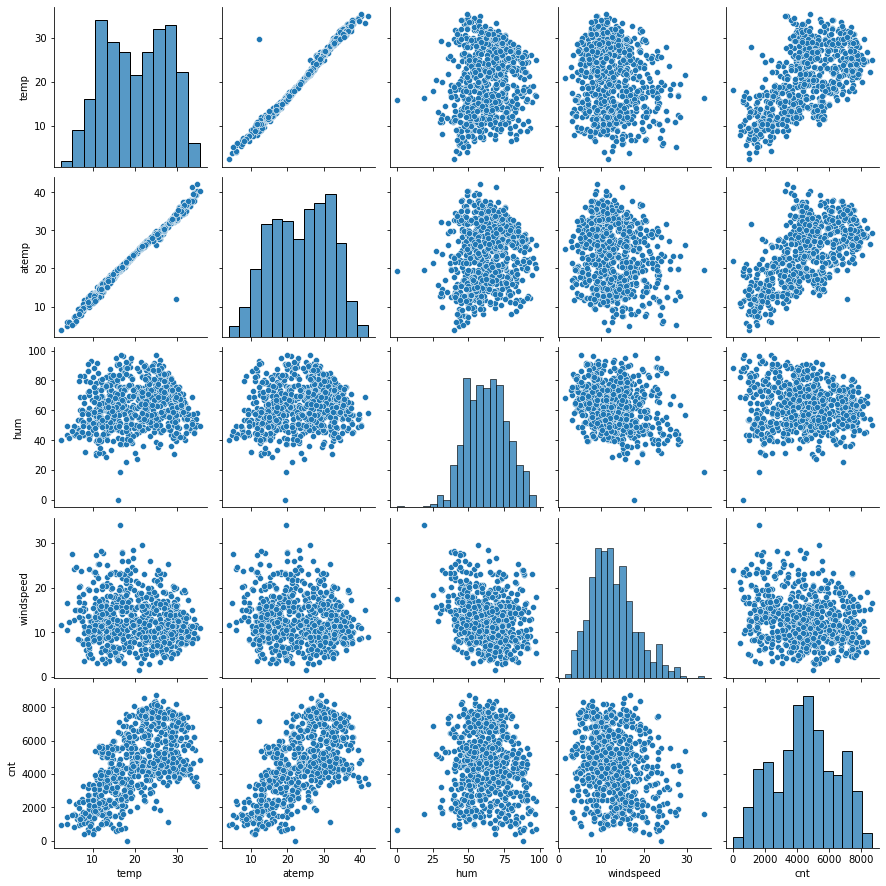

In [9]:
plt.figure(figsize=[20,10])
sns.pairplot(data,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

Observations:

    - temp and atemp are highly correlated
    - the cnt increases with increase in the temp and atemp

#### 2. Visualising Categorical values/columns

In [10]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


Replacing numbers with labels

In [11]:
#season column
data["season"].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
mnth_lab={
   1 : 'january',
    2 : 'february',
    3 : 'march',
    4 : 'april',
    5 : 'may',
    6 : 'june',
    7 : 'july',
    8 : 'august',
    9 : 'september',
    10 : 'october',
    11 : 'november',
    12 : 'december'
}
#replacing mnth labels
data["mnth"]=data["mnth"].replace(mnth_lab)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,january,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,january,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,january,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,january,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,january,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
#weekday
data["weekday"].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,january,0,Monday,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,january,0,Tuesday,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,january,0,Wednesday,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,january,0,Thursday,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,january,0,Friday,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
data["weathersit"].replace({1:"Clear_Few_Clouds",2:"Cloudy_Mist",3:"Light_Rain Snow_Thunderstorm",4:"Heavy_Rain Ice_Pallets Thunderstorms"},inplace=True)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,january,0,Monday,1,Cloudy_Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,january,0,Tuesday,1,Cloudy_Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,january,0,Wednesday,1,Clear_Few_Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,january,0,Thursday,1,Clear_Few_Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,january,0,Friday,1,Clear_Few_Clouds,9.305237,11.46350,43.6957,12.522300,1600


Plotting heatmap to get the correlation between variables

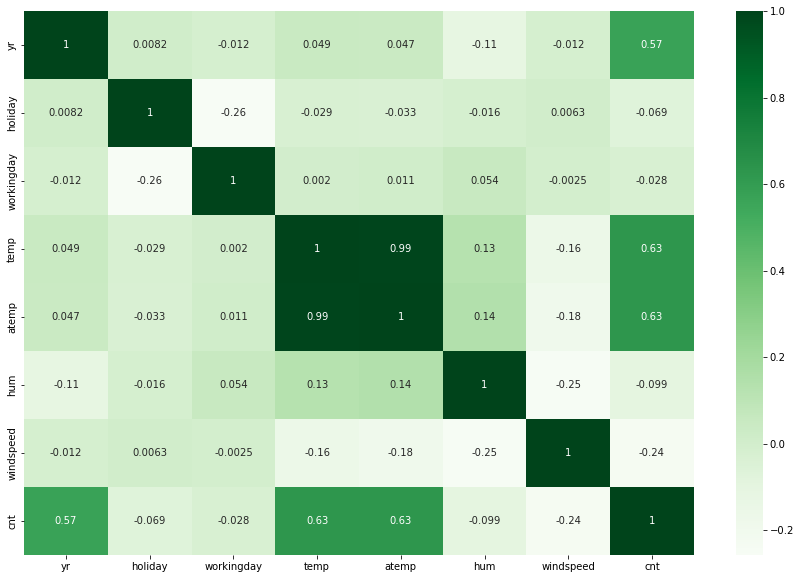

In [15]:
plt.figure(figsize=[15,10])
sns.heatmap(data.corr(),annot=True, cmap="Greens")
plt.show()

Observations:
    
    -temp and atemp have a correlation of 0.99, which is very high

Since correlation of temp and atemp is high we can drop one of these. Dropping temp and keeping atemp for further analysis

In [16]:
data.drop("temp",axis=1,inplace=True)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,january,0,Monday,1,Cloudy_Mist,18.18125,80.5833,10.749882,985
1,spring,0,january,0,Tuesday,1,Cloudy_Mist,17.68695,69.6087,16.652113,801
2,spring,0,january,0,Wednesday,1,Clear_Few_Clouds,9.47025,43.7273,16.636703,1349
3,spring,0,january,0,Thursday,1,Clear_Few_Clouds,10.60610,59.0435,10.739832,1562
4,spring,0,january,0,Friday,1,Clear_Few_Clouds,11.46350,43.6957,12.522300,1600


To understand the categorical data, we plot boxplots for the categorical columns

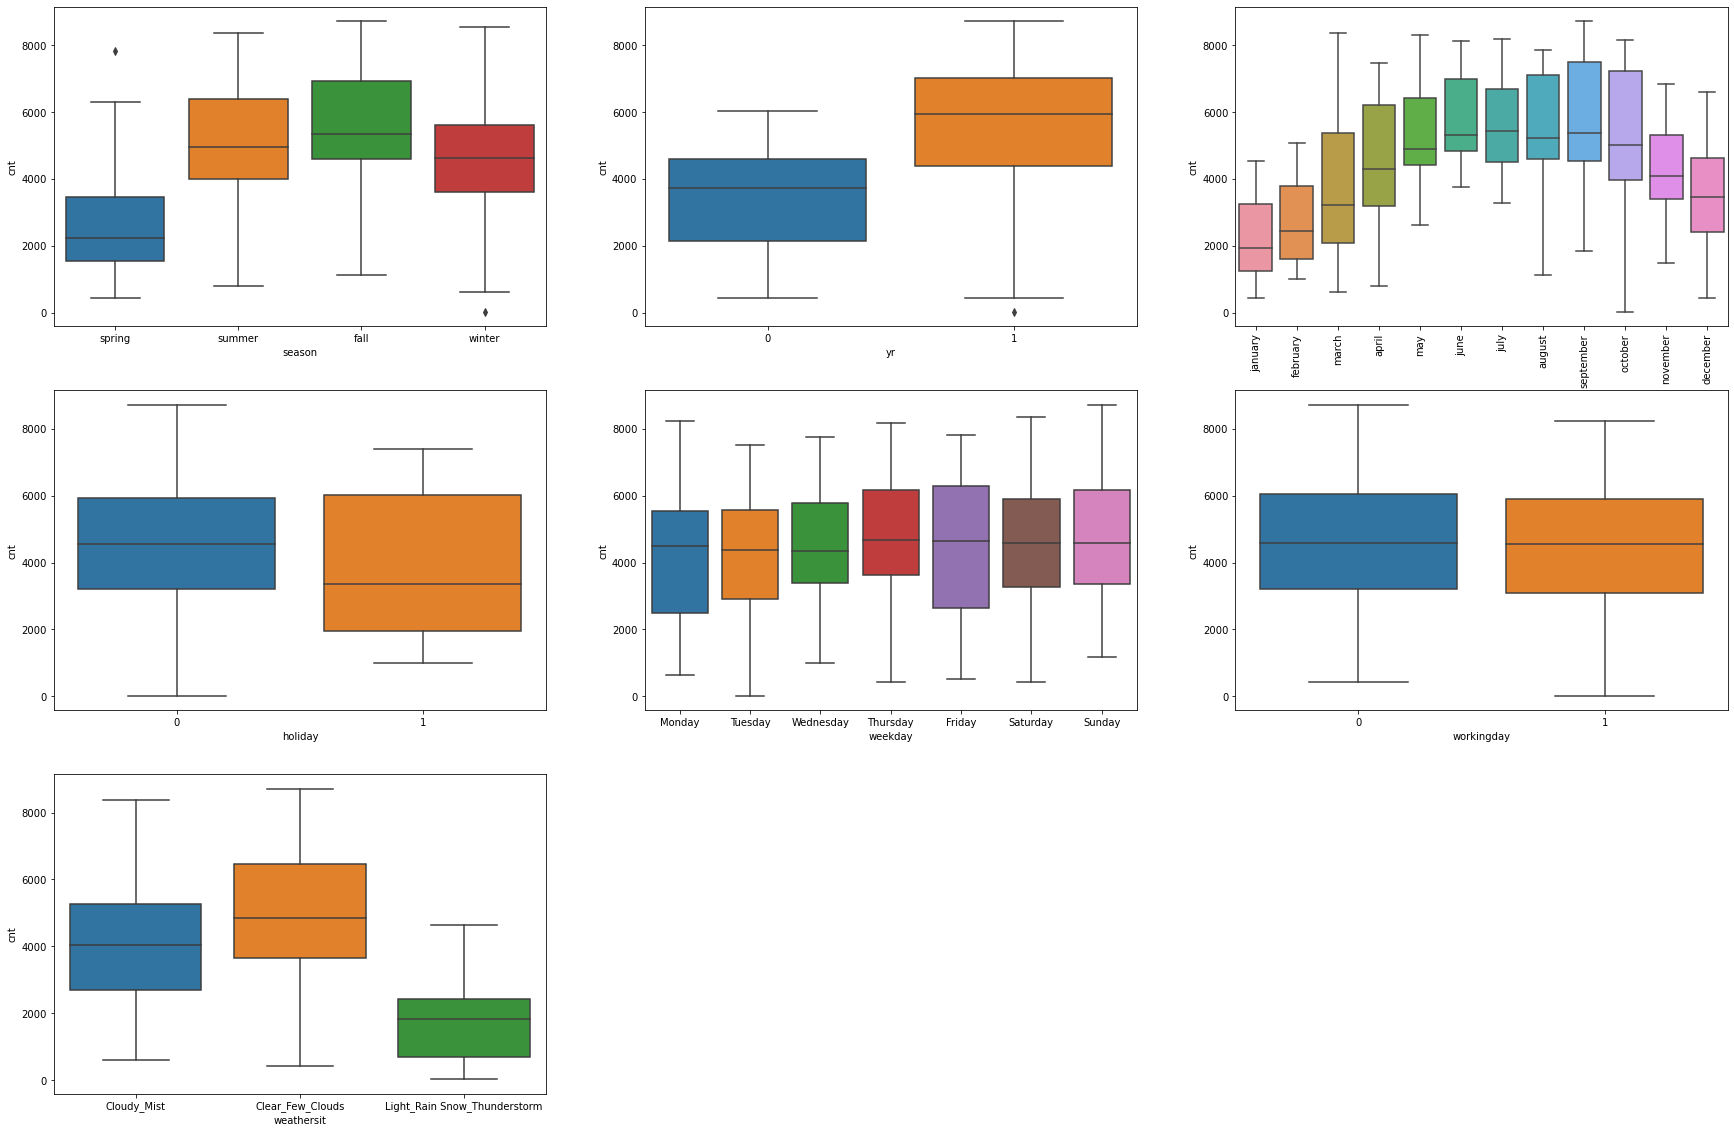

In [17]:
plt.figure(figsize=[30,20])
#season
plt.subplot(3,3,1)
sns.boxplot(data=data,x="season",y="cnt")

#yr
plt.subplot(3,3,2)
sns.boxplot(data=data,x="yr",y="cnt")

#mnth
plt.subplot(3,3,3)
sns.boxplot(data=data,x="mnth",y="cnt")
plt.xticks(rotation=90)

#holiday
plt.subplot(3,3,4)
sns.boxplot(data=data,x="holiday",y="cnt")

#weekday
plt.subplot(3,3,5)
sns.boxplot(data=data,x="weekday",y="cnt")

#workingday
plt.subplot(3,3,6)
sns.boxplot(data=data,x="workingday",y="cnt")

#weathersit
plt.subplot(3,3,7)
sns.boxplot(data=data,x="weathersit",y="cnt")

plt.show()

Observations:
    
    - For season vs cnt, fall has the highest number of average rentals. Second highest is in summer.
    - For year vs cnt, 2019 has considerably higher rentals. 2018 has median of 4k, whereas 2019 has a median of 6k.
    - For months vs cnt, September has the highest rentals, followed by august and october and other surrounding months. 
        This trend can be seen in the season wise rental count as well.
    - For holiday vs cnt, non holiday days show more rentals.
    - For weekday vs cnt, no significance difference can be seen.
    - For workingday vs cnt, no significance difference.
    - For weathersit vs cnt, Clear few clouds days show higher rentals followed by Cloudy and misty days.

## PREPARING DATA FOR MODEL BUILDING

##### Creating summy variables for the categorical variables

In [18]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,january,0,Monday,1,Cloudy_Mist,18.18125,80.5833,10.749882,985
1,spring,0,january,0,Tuesday,1,Cloudy_Mist,17.68695,69.6087,16.652113,801
2,spring,0,january,0,Wednesday,1,Clear_Few_Clouds,9.47025,43.7273,16.636703,1349
3,spring,0,january,0,Thursday,1,Clear_Few_Clouds,10.60610,59.0435,10.739832,1562
4,spring,0,january,0,Friday,1,Clear_Few_Clouds,11.46350,43.6957,12.522300,1600


In [19]:
#Convert variables to object type
data['mnth']=data['mnth'].astype(object)
data['season']=data['season'].astype(object)
data['weathersit']=data['weathersit'].astype(object)
data['weekday']=data['weekday'].astype(object)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [20]:
#season
Season=pd.get_dummies(data["season"],drop_first=True)

#mnth
Month=pd.get_dummies(data['mnth'],drop_first=True)

#weekday
Weekday=pd.get_dummies(data["weekday"],drop_first=True)

#weathersit
Weathersit=pd.get_dummies(data['weathersit'],drop_first=True)

In [21]:
#concatanating with main dataframe

data=pd.concat([data,Season],axis=1)

data=pd.concat([data,Month],axis=1)

data=pd.concat([data,Weekday],axis=1)

data=pd.concat([data,Weathersit],axis=1)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   season                        730 non-null    object 
 1   yr                            730 non-null    int64  
 2   mnth                          730 non-null    object 
 3   holiday                       730 non-null    int64  
 4   weekday                       730 non-null    object 
 5   workingday                    730 non-null    int64  
 6   weathersit                    730 non-null    object 
 7   atemp                         730 non-null    float64
 8   hum                           730 non-null    float64
 9   windspeed                     730 non-null    float64
 10  cnt                           730 non-null    int64  
 11  spring                        730 non-null    uint8  
 12  summer                        730 non-null    uint8  
 13  winte

In [23]:
#dropping the unwanted columns

data.drop(["season","mnth","weekday","weathersit"],axis=1,inplace=True)

data.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,october,september,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy_Mist,Light_Rain Snow_Thunderstorm
0,0,0,1,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
data.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'august', 'december', 'february',
       'january', 'july', 'june', 'march', 'may', 'november', 'october',
       'september', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Cloudy_Mist', 'Light_Rain Snow_Thunderstorm'],
      dtype='object')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   yr                            730 non-null    int64  
 1   holiday                       730 non-null    int64  
 2   workingday                    730 non-null    int64  
 3   atemp                         730 non-null    float64
 4   hum                           730 non-null    float64
 5   windspeed                     730 non-null    float64
 6   cnt                           730 non-null    int64  
 7   spring                        730 non-null    uint8  
 8   summer                        730 non-null    uint8  
 9   winter                        730 non-null    uint8  
 10  august                        730 non-null    uint8  
 11  december                      730 non-null    uint8  
 12  february                      730 non-null    uint8  
 13  janua

### Splitting data into train and test set

In [26]:
from sklearn.model_selection import train_test_split


In [27]:
data_train,data_test=train_test_split(data,train_size=0.70, test_size=0.3,random_state=100)

In [28]:
data_train.shape

(510, 29)

In [29]:
data_test.shape

(219, 29)

#### Scaling the numerical values/columns

In [30]:
#numerical columns = atemp, hum, windspeed,cnt

from sklearn.preprocessing import MinMaxScaler 


In [31]:
scaler = MinMaxScaler()

In [32]:
num_vars=["atemp","hum","windspeed","cnt"]
data_train[num_vars]= scaler.fit_transform(data_train[num_vars])

In [33]:
data_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,october,september,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy_Mist,Light_Rain Snow_Thunderstorm
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,1,0,0,0,1,0
728,1,0,1,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,1,0,0,0,1,0


#### From data_train, let's creat X_train and y_train

In [34]:
y_train=data_train.pop("cnt")


In [35]:
X_train=data_train

In [36]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [37]:
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,august,...,october,september,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy_Mist,Light_Rain Snow_Thunderstorm
653,1,0,1,0.501133,0.575354,0.300794,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
728,1,0,1,0.200348,0.498067,0.663106,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [38]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'august', 'december', 'february', 'january', 'july',
       'june', 'march', 'may', 'november', 'october', 'september', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Cloudy_Mist',
       'Light_Rain Snow_Thunderstorm'],
      dtype='object')

### Using RFE to select the 15 best columns to build the model

In [39]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

Steps : 

    1. RFE to select 15 best columns
    2. Using p value analysis to delete the redundant columns

In [40]:
lm = LinearRegression()


In [41]:
lm.fit(X_train,y_train)
rfe = RFE(lm, n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)

In [42]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 5),
 ('summer', True, 1),
 ('winter', True, 1),
 ('august', True, 1),
 ('december', True, 1),
 ('february', True, 1),
 ('january', True, 1),
 ('july', False, 10),
 ('june', False, 7),
 ('march', False, 14),
 ('may', False, 6),
 ('november', True, 1),
 ('october', False, 12),
 ('september', True, 1),
 ('Monday', False, 9),
 ('Saturday', False, 3),
 ('Sunday', False, 4),
 ('Thursday', False, 13),
 ('Tuesday', False, 8),
 ('Wednesday', False, 11),
 ('Cloudy_Mist', True, 1),
 ('Light_Rain Snow_Thunderstorm', True, 1)]

In [43]:
cols = X_train.columns[rfe.support_]
cols

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'summer', 'winter',
       'august', 'december', 'february', 'january', 'november', 'september',
       'Cloudy_Mist', 'Light_Rain Snow_Thunderstorm'],
      dtype='object')

In [44]:
X_train.columns[~rfe.support_]

Index(['workingday', 'spring', 'july', 'june', 'march', 'may', 'october',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [45]:
X_train_rfe=X_train[cols]

In [46]:
X_train_rfe.head()

,yr,holiday,atemp,hum,windspeed,summer,winter,august,december,february,january,november,september,Cloudy_Mist,Light_Rain Snow_Thunderstorm
653,1,0,0.501133,0.575354,0.300794,0,1,0,0,0,0,0,0,0,0
576,1,0,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,0,0,0
426,1,0,0.438975,0.640189,0.255342,0,0,0,0,0,0,0,0,1,0
728,1,0,0.200348,0.498067,0.663106,0,0,0,1,0,0,0,0,0,0
482,1,0,0.391735,0.504508,0.188475,1,0,0,0,0,0,0,0,1,0


### BUILDING THE MODEL USING STATSMODELS

In [47]:
import statsmodels.api as sm

In [48]:
#adding constant
X_train_rfe_sm=sm.add_constant(X_train_rfe)

In [49]:
lm=sm.OLS(y_train,X_train_rfe_sm).fit()

In [50]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.1
Date:                Thu, 27 Oct 2022   Prob (F-statistic):          1.26e-186
Time:                        22:51:10   Log-Likelihood:                 508.57
No. Observations:                 510   AIC:                            -985.1
Df Residuals:                     494   BIC:                            -917.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

##### Calculating VIF

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [52]:

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.11
2,atemp,14.42
4,windspeed,3.89
6,winter,3.04
5,summer,2.28
13,Cloudy_Mist,2.24
0,yr,2.06
10,january,1.92
11,november,1.85
8,december,1.63


Notes:
    
    hum has very high VIF so dropping it

MODEL 1:

In [53]:
X_train_rfe=X_train_rfe.drop("hum", axis=1)

In [54]:
X_train_rfe_sm=sm.add_constant(X_train_rfe)
lm1=sm.OLS(y_train,X_train_rfe_sm).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     180.0
Date:                Thu, 27 Oct 2022   Prob (F-statistic):          7.00e-184
Time:                        22:51:10   Log-Likelihood:                 499.30
No. Observations:                 510   AIC:                            -968.6
Df Residuals:                     495   BIC:                            -905.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [55]:
#vif

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,atemp,4.99
3,windspeed,3.83
5,winter,2.62
0,yr,2.06
4,summer,2.04
10,november,1.81
6,august,1.59
12,Cloudy_Mist,1.57
7,december,1.41
11,september,1.35


Note:
    
    atemp has high vif, so dropping it

MODEL 2:

In [56]:
X_train_rfe=X_train_rfe.drop("atemp",axis=1)

In [57]:
X_train_rfe_sm2=sm.add_constant(X_train_rfe)
lm2=sm.OLS(y_train,X_train_rfe_sm2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     127.8
Date:                Thu, 27 Oct 2022   Prob (F-statistic):          6.20e-149
Time:                        22:51:10   Log-Likelihood:                 413.36
No. Observations:                 510   AIC:                            -798.7
Df Residuals:                     496   BIC:                            -739.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [58]:
#vif

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,windspeed,3.06
4,winter,2.49
0,yr,1.85
3,summer,1.80
9,november,1.80
11,Cloudy_Mist,1.55
6,december,1.40
8,january,1.27
7,february,1.26
5,august,1.24


Notes:
    
    windspeed hass vif > 2 so dropping it

In [59]:
X_train_rfe.columns

Index(['yr', 'holiday', 'windspeed', 'summer', 'winter', 'august', 'december',
       'february', 'january', 'november', 'september', 'Cloudy_Mist',
       'Light_Rain Snow_Thunderstorm'],
      dtype='object')

MODEL 3:

In [60]:
X_train_rfe=X_train_rfe.drop("windspeed",axis=1)

In [61]:
X_train_rfe_sm3=sm.add_constant(X_train_rfe)
lm3=sm.OLS(y_train,X_train_rfe_sm3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     118.3
Date:                Thu, 27 Oct 2022   Prob (F-statistic):          4.35e-137
Time:                        22:51:10   Log-Likelihood:                 382.62
No. Observations:                 510   AIC:                            -739.2
Df Residuals:                     497   BIC:                            -684.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [62]:
#vif 

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
3,winter,2.39
8,november,1.77
0,yr,1.71
10,Cloudy_Mist,1.53
5,december,1.37
2,summer,1.36
4,august,1.16
7,january,1.15
9,september,1.14
6,february,1.09


Notes:
    
    winter hass vif > 2, so dropping it

MODEL 4:

In [63]:
X_train_rfe=X_train_rfe.drop("winter",axis=1)

In [64]:
X_train_rfe_sm4=sm.add_constant(X_train_rfe)
lm4=sm.OLS(y_train,X_train_rfe_sm4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     119.4
Date:                Thu, 27 Oct 2022   Prob (F-statistic):          6.54e-132
Time:                        22:51:10   Log-Likelihood:                 367.80
No. Observations:                 510   AIC:                            -711.6
Df Residuals:                     498   BIC:                            -660.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [65]:
#vif

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,yr,1.63
9,Cloudy_Mist,1.47
2,summer,1.33
3,august,1.15
6,january,1.14
7,november,1.13
8,september,1.13
4,december,1.10
5,february,1.08
1,holiday,1.06


Notes:
    
    -vif of all the columns is below 2, which is fine
    - p vals are also very less

Let us add variables to the model and check if the r square increases or not

In [66]:
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,august,...,october,september,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy_Mist,Light_Rain Snow_Thunderstorm
653,1,0,1,0.501133,0.575354,0.300794,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
728,1,0,1,0.200348,0.498067,0.663106,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


MODEL 5:

Adding spring to the model

In [67]:
X_train_rfe['spring']=X_train['spring']

In [68]:
X_train_rfe_sm5=sm.add_constant(X_train_rfe)
lm5=sm.OLS(y_train,X_train_rfe_sm5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     148.6
Date:                Thu, 27 Oct 2022   Prob (F-statistic):          1.01e-155
Time:                        22:51:10   Log-Likelihood:                 426.93
No. Observations:                 510   AIC:                            -827.9
Df Residuals:                     497   BIC:                            -772.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [69]:
#vif

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
11,spring,3.17
6,january,2.12
5,february,1.84
0,yr,1.68
9,Cloudy_Mist,1.49
2,summer,1.34
4,december,1.16
3,august,1.15
7,november,1.14
8,september,1.14


In [70]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'august', 'december', 'february', 'january', 'july',
       'june', 'march', 'may', 'november', 'october', 'september', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Cloudy_Mist',
       'Light_Rain Snow_Thunderstorm'],
      dtype='object')

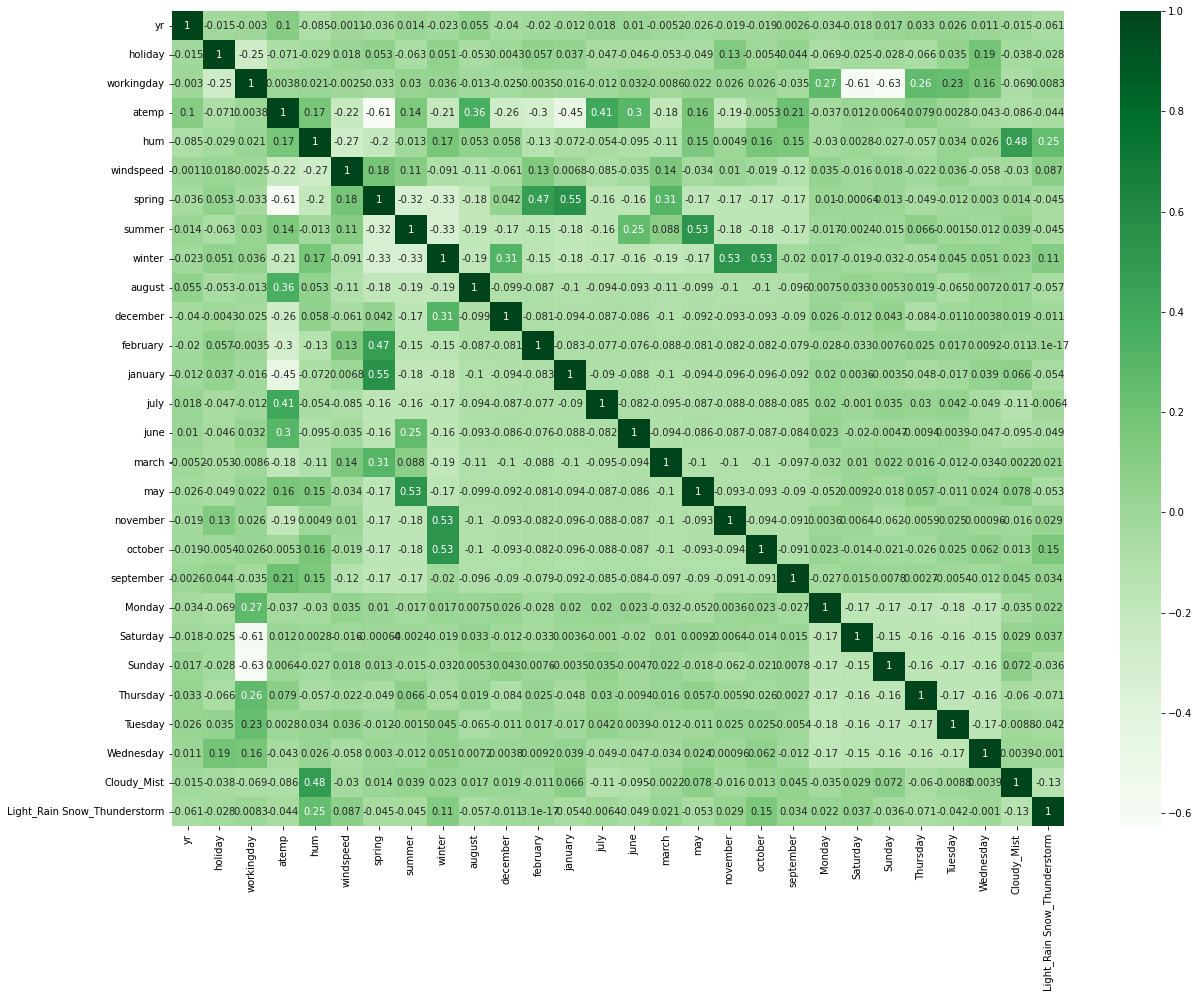

In [71]:
plt.figure(figsize=[20,15])
sns.heatmap(X_train.corr(),annot=True, cmap="Greens")
plt.show()

We can see that spring is highly correlated to jan and feb, so lets drop jan and feb from out model and check the r square and vif

MODEL 6:

In [72]:
X_train_rfe=X_train_rfe.drop(["january","february"], axis=1)

In [73]:
X_train_rfe_sm6=sm.add_constant(X_train_rfe)
lm6=sm.OLS(y_train,X_train_rfe_sm6).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     160.8
Date:                Thu, 27 Oct 2022   Prob (F-statistic):          4.96e-149
Time:                        22:51:13   Log-Likelihood:                 405.78
No. Observations:                 510   AIC:                            -789.6
Df Residuals:                     499   BIC:                            -743.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [74]:
#vif

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,yr,1.68
7,Cloudy_Mist,1.47
2,summer,1.34
9,spring,1.30
3,august,1.15
6,september,1.14
5,november,1.13
4,december,1.08
1,holiday,1.06
8,Light_Rain Snow_Thunderstorm,1.03


Notes :
    
    - r suqared has increased
    - vif of spring has gone down

MODEL 7:

Adding october to the model

In [75]:
X_train_rfe['october']=X_train['october']

In [76]:
X_train_rfe_sm7=sm.add_constant(X_train_rfe)
lm7=sm.OLS(y_train,X_train_rfe_sm7).fit()
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     145.9
Date:                Thu, 27 Oct 2022   Prob (F-statistic):          6.46e-148
Time:                        22:51:14   Log-Likelihood:                 405.78
No. Observations:                 510   AIC:                            -787.6
Df Residuals:                     498   BIC:                            -736.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

p val for october is very high so dropping it

In [77]:
X_train_rfe=X_train_rfe.drop("october",axis=1)

MODEL 8:

    Adding workingday in the model

In [78]:
X_train_rfe["workingday"]=X_train["workingday"]

In [79]:
X_train_rfe_sm8=sm.add_constant(X_train_rfe)
lm8=sm.OLS(y_train,X_train_rfe_sm8).fit()
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     147.7
Date:                Thu, 27 Oct 2022   Prob (F-statistic):          6.12e-149
Time:                        22:51:14   Log-Likelihood:                 408.21
No. Observations:                 510   AIC:                            -792.4
Df Residuals:                     498   BIC:                            -741.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [80]:
#vif

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
10,workingday,2.54
0,yr,1.79
2,summer,1.63
9,spring,1.54
7,Cloudy_Mist,1.48
5,november,1.27
3,august,1.24
6,september,1.21
4,december,1.13
1,holiday,1.10


Working day has high vif i.e. < 2, so dropping it

In [81]:
X_train_rfe=X_train_rfe.drop("workingday",axis=1)

MODEL 9:

Adding sunday to the model

In [82]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'august', 'december', 'february', 'january', 'july',
       'june', 'march', 'may', 'november', 'october', 'september', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Cloudy_Mist',
       'Light_Rain Snow_Thunderstorm'],
      dtype='object')

In [83]:
X_train_rfe["Sunday"]=X_train["Sunday"]

In [84]:
X_train_rfe_sm9=sm.add_constant(X_train_rfe)
lm9=sm.OLS(y_train,X_train_rfe_sm9).fit()
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     146.5
Date:                Thu, 27 Oct 2022   Prob (F-statistic):          2.92e-148
Time:                        22:51:14   Log-Likelihood:                 406.59
No. Observations:                 510   AIC:                            -789.2
Df Residuals:                     498   BIC:                            -738.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

P val for sunday is high, so dropping it

In [85]:
X_train_rfe=X_train_rfe.drop("Sunday",axis=1)

MODEL 10:

Adding Saturday to the model

In [86]:
X_train_rfe["Saturday"]=X_train["Saturday"]

In [87]:
X_train_rfe_sm10=sm.add_constant(X_train_rfe)
lm10=sm.OLS(y_train,X_train_rfe_sm10).fit()
print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     146.6
Date:                Thu, 27 Oct 2022   Prob (F-statistic):          2.36e-148
Time:                        22:51:14   Log-Likelihood:                 406.82
No. Observations:                 510   AIC:                            -789.6
Df Residuals:                     498   BIC:                            -738.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

p val for Saturday is high, so dropping it

In [88]:
X_train_rfe=X_train_rfe.drop("Saturday",axis=1)

MODEL 11:

Adding july to the model

In [89]:
X_train_rfe["july"]=X_train["july"]

In [90]:
X_train_rfe_sm11=sm.add_constant(X_train_rfe)
lm11=sm.OLS(y_train,X_train_rfe_sm11).fit()
print(lm11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     146.0
Date:                Thu, 27 Oct 2022   Prob (F-statistic):          5.06e-148
Time:                        22:51:14   Log-Likelihood:                 406.03
No. Observations:                 510   AIC:                            -788.1
Df Residuals:                     498   BIC:                            -737.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

MODEL 12:
    
    Removing august and adding atemp

In [91]:
X_train_rfe=X_train_rfe.drop("august",axis=1)

In [92]:
X_train_rfe["atemp"]=X_train["atemp"]

In [93]:
X_train_rfe_sm12=sm.add_constant(X_train_rfe)
lm12=sm.OLS(y_train,X_train_rfe_sm12).fit()
print(lm12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     203.7
Date:                Thu, 27 Oct 2022   Prob (F-statistic):          2.29e-176
Time:                        22:51:14   Log-Likelihood:                 473.19
No. Observations:                 510   AIC:                            -922.4
Df Residuals:                     498   BIC:                            -871.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [94]:
#vif

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
10,atemp,3.88
0,yr,2.03
2,summer,1.76
6,Cloudy_Mist,1.51
9,july,1.49
5,september,1.35
8,spring,1.31
4,november,1.17
3,december,1.10
1,holiday,1.06


MODEL 13:
    
    removing july from model, because atemp is correlated with july

In [95]:
X_train_rfe=X_train_rfe.drop("july",axis=1)

In [96]:
X_train_rfe_sm13=sm.add_constant(X_train_rfe)
lm13=sm.OLS(y_train,X_train_rfe_sm13).fit()
print(lm13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     215.6
Date:                Thu, 27 Oct 2022   Prob (F-statistic):          5.63e-174
Time:                        22:51:14   Log-Likelihood:                 464.74
No. Observations:                 510   AIC:                            -907.5
Df Residuals:                     499   BIC:                            -860.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [97]:
#vif

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
9,atemp,2.81
0,yr,2.03
2,summer,1.54
6,Cloudy_Mist,1.50
8,spring,1.27
5,september,1.25
4,november,1.14
3,december,1.09
1,holiday,1.06
7,Light_Rain Snow_Thunderstorm,1.04


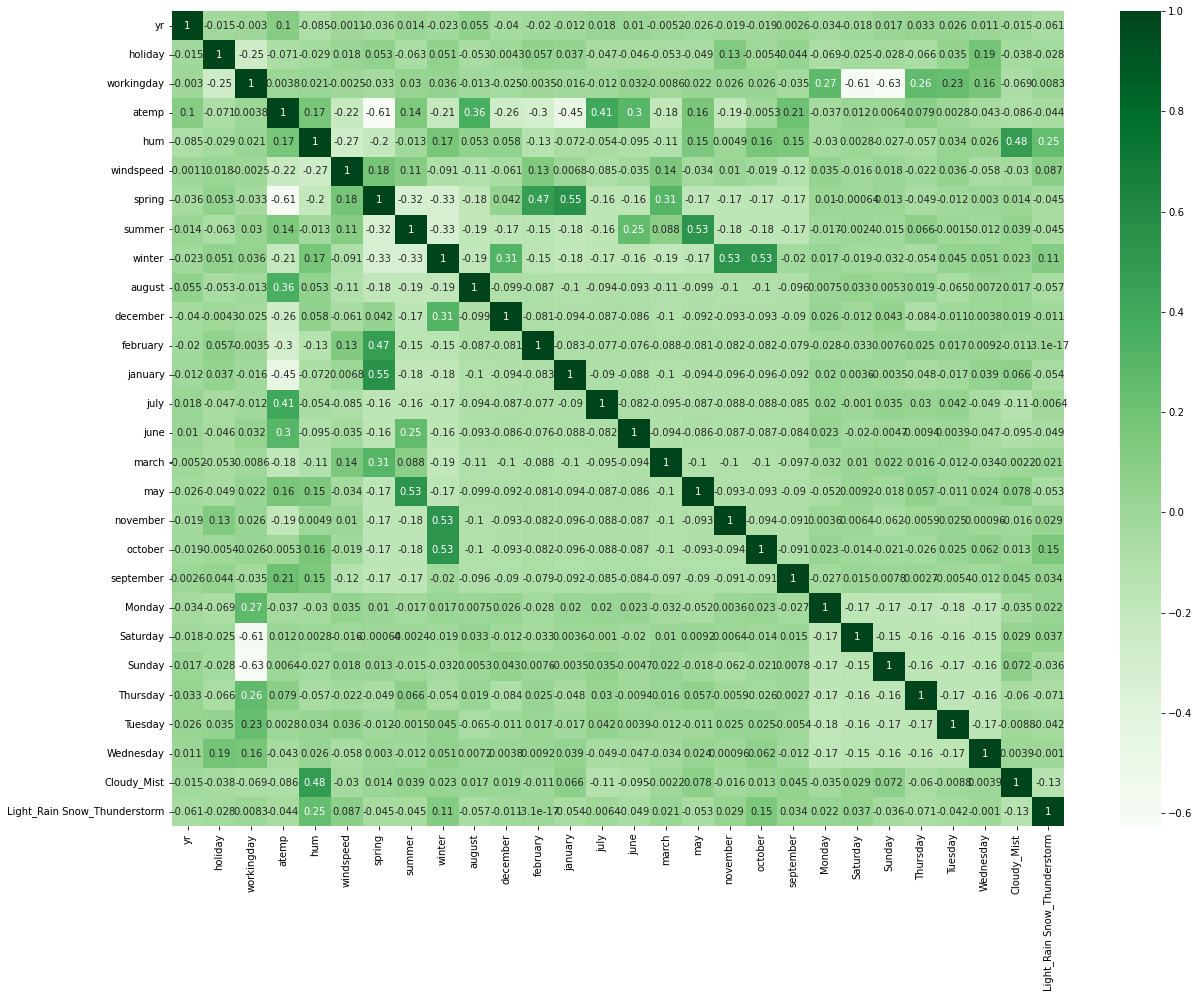

In [98]:
plt.figure(figsize=[20,15])
sns.heatmap(X_train.corr(),annot=True, cmap="Greens")
plt.show()

In [99]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'august', 'december', 'february', 'january', 'july',
       'june', 'march', 'may', 'november', 'october', 'september', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Cloudy_Mist',
       'Light_Rain Snow_Thunderstorm'],
      dtype='object')

MODEL 14:

    - Dropping  december and november 
    - Adding winter

In [100]:
X_train_rfe=X_train_rfe.drop(["november","december"],axis=1)

In [101]:
X_train_rfe["winter"]=X_train["winter"]

In [102]:
X_train_rfe_sm14=sm.add_constant(X_train_rfe)
lm14=sm.OLS(y_train,X_train_rfe_sm14).fit()
print(lm14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     252.6
Date:                Thu, 27 Oct 2022   Prob (F-statistic):          1.07e-179
Time:                        22:51:17   Log-Likelihood:                 475.38
No. Observations:                 510   AIC:                            -930.8
Df Residuals:                     500   BIC:                            -888.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [103]:
#vif

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
7,atemp,2.95
0,yr,2.05
2,summer,1.64
4,Cloudy_Mist,1.54
8,winter,1.45
6,spring,1.33
3,september,1.23
5,Light_Rain Snow_Thunderstorm,1.06
1,holiday,1.04


NOTES:
    
    1. Total 9 variables selected
    2. MODEL 14 is giving good r quare =0.820, means it explains 82% variablity in the data. Adj r sq = 81.6%
    3. P val for all the entities is almost 0
    4. The Prob (F-statistic): 1.07e-179 which is quite high, means the model is stable.

### RESIDUAL ANALYSIS

In [104]:
#predicting values

y_train_pred=lm14.predict(X_train_rfe_sm14)

In [105]:
res=y_train-y_train_pred

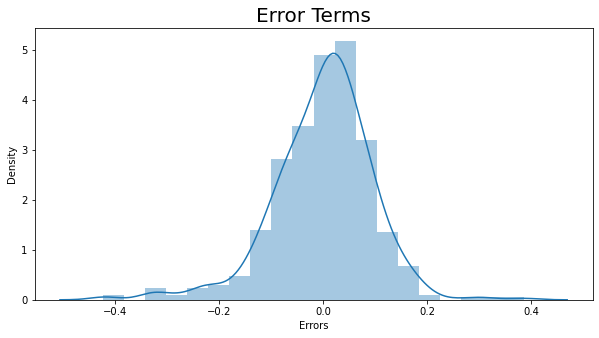

In [106]:
plt.figure(figsize=[10,5])
sns.distplot((res),bins=20)
plt.title("Error Terms", fontsize=20)
plt.xlabel("Errors", fontsize=10)
plt.show()

### TESTING THE MODEL WITH TEST DATA AND EVALUATING

In [ ]:
#Scaling the test data

num_vars=['atemp','hum','windspeed','cnt']
data_test[num_vars] = scaler.transform(data_test[num_vars])

In [ ]:
y_test = data_test.pop('cnt')
X_test = data_test

In [112]:
X_train_new=X_train_rfe_sm14.drop(['const'], axis=1)

#### Checking if residuals have any pattern with the independent variables

In [113]:
X_t=X_train_new.iloc[:,0].values

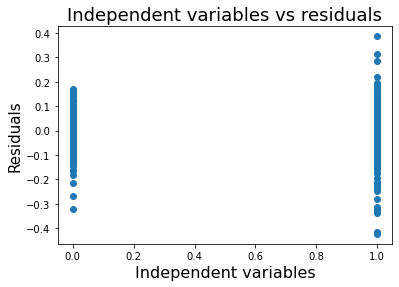

In [116]:
plt.figure()
plt.scatter(X_t,res)
plt.title('Independent variables vs residuals', fontsize=18)               
plt.xlabel('Independent variables', fontsize=16)                         
plt.ylabel('Residuals', fontsize=15)  
plt.show()

Observation:
    
    - There is no pattern between the residuals and independent variables, therefore our model is good

In [ ]:
X_test_new=X_test[X_train_new.columns]


In [ ]:
#Adding constant

X_test_new = sm.add_constant(X_test_new)

In [ ]:
X_test_new.columns

In [ ]:
#making predictions using our final model lm14

y_test_pred=lm14.predict(X_test_new)

#### Evaluating predicted vs test data

In [ ]:
plt.figure(figsize=[10,5])
plt.scatter(y_test,y_test_pred)

plt.title('y_test vs y_predicted', fontsize=20)               
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16) 
plt.show()

OBSERVATIONS:
    
    1. Model seems trustable enough to predict the demand in bikes.
    2. The actual and predicted count of is overlapping, thus meaning that model is stable and is able to explain the demand

### Calculating the r squared score of the test

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r_sq = r2_score(y_test, y_test_pred)

In [ ]:
print(r_sq)

NOTES:
    
    1. R squared of our model 0.82 and R squared of test came out to be 0.81

EQUATION OF THE BEST FITTED LINE IS:
    
cnt = 0.1654 + 0.2344yr - 0.0958holiday + 0.0377summer + 0.0912september - 0.0789Cloudy_Mist - 0.2946Light_Rain Snow_Thunderstorm  - 0.0836spring + 0.4910atemp + 0.0773winter

In [ ]:
/* Final Points:
1) Demand of bikes is less in spring season, highest in the fall followed by summer. 
2) Year 2019 
had higher demand as compared to 2018. 
3) August, September, October months have higher demands. 
4) Demand for bikes is more on days when weather is clear or less cloudy. */